In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


## LOAD DATASET

In [12]:
df=pd.read_csv("netflix_titles.csv")


In [19]:
print(df.head())


  show_id     type                  title         director   
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  \
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country   
0                                                NaN  United States  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration   
0  September 25, 2021          2020  PG-13     90 min  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [18]:
print(df.info)

<bound method DataFrame.info of      show_id     type                  title         director   
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country   
0                                                   NaN  United States  \
1     Ama Qamata, Khosi Ngema, Gail Mab

## DATA CLEANING

In [24]:

df["date_added"]=pd.to_datetime(df["date_added"])
df["year_added"]=pd.to_datetime(df["date_added"].dt.year)
df["director"].fillna('Unknown',inplace=True)
df["country"].fillna('Unknown',inplace=True)
df["cast"].fillna('Unknown',inplace=True)
df["rating"].fillna('Unknown',inplace=True)



## CONTENT TYPE DISTRIBUTION (MOVIES VS TV SHOWS)

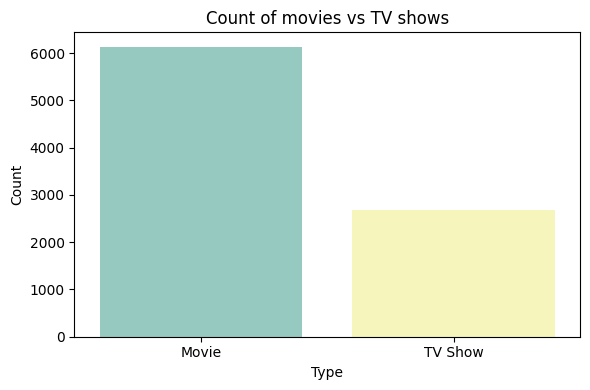

In [28]:
plt.figure(figsize=(6,4))
sb.countplot(data=df,x='type',palette='Set3')
plt.title('Count of movies vs TV shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Content Added Over the Years

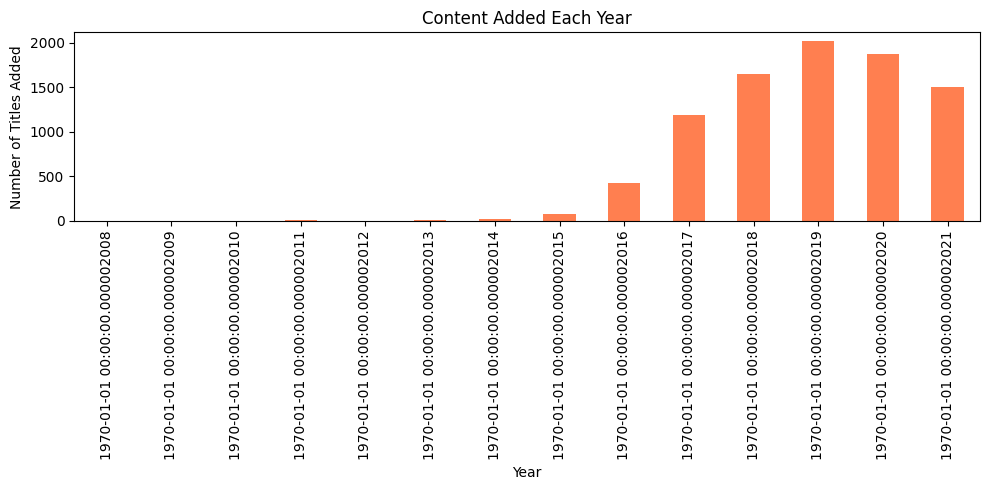

In [29]:
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Content Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


## Top 10 Countries with Most Content

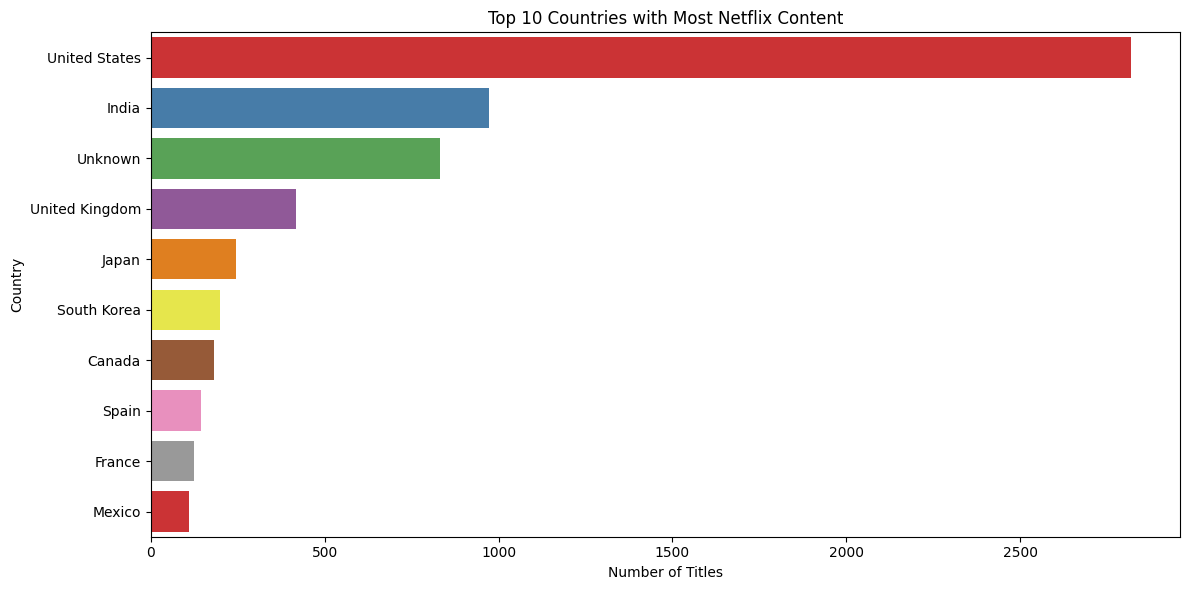

In [31]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sb.barplot(x=top_countries.values, y=top_countries.index, palette='Set1')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## Rating Distribution


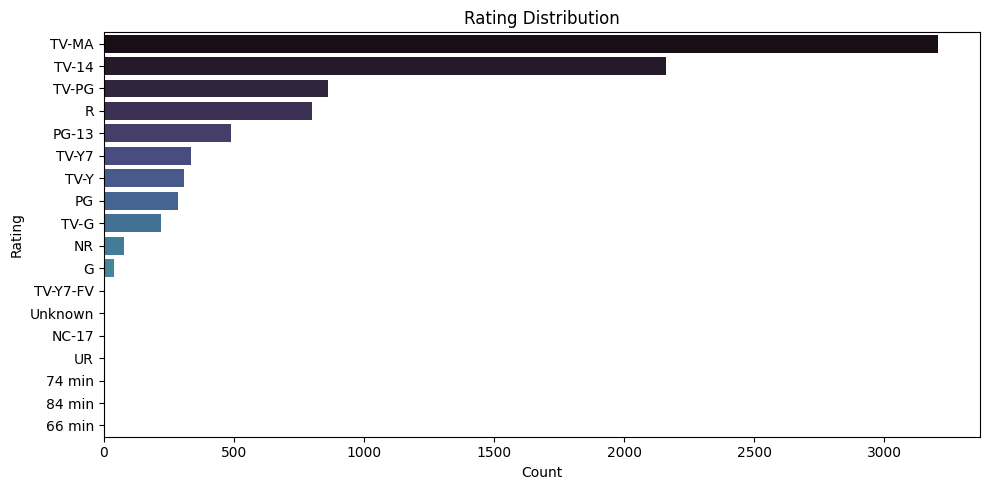

In [32]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='mako')
plt.title('Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


## Movie Duration Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14960\4068250612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


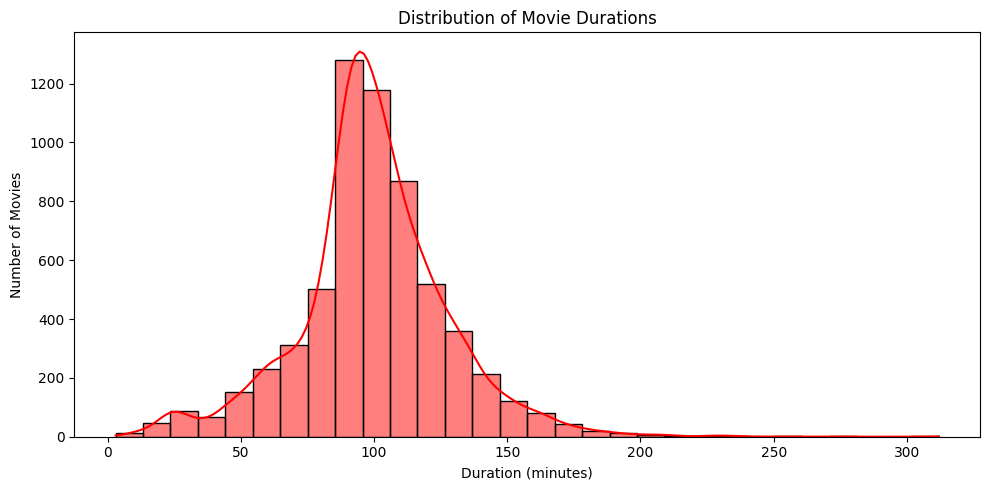

In [35]:
# Filter only movies and extract numeric duration
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10,5))
sb.histplot(movies['duration_minutes'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


## Top 10 Most Common Genres

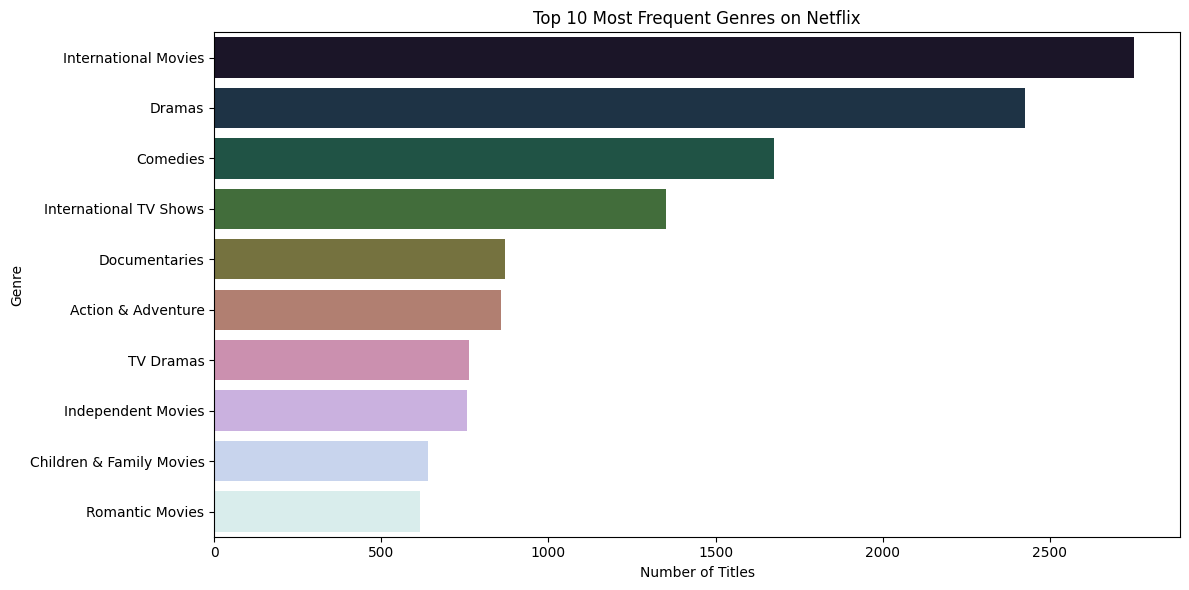

In [37]:
# Explode multiple genres
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12,6))
sb.barplot(x=top_genres.values, y=top_genres.index, palette='cubehelix')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## Top 10 Directors by Number of Titles

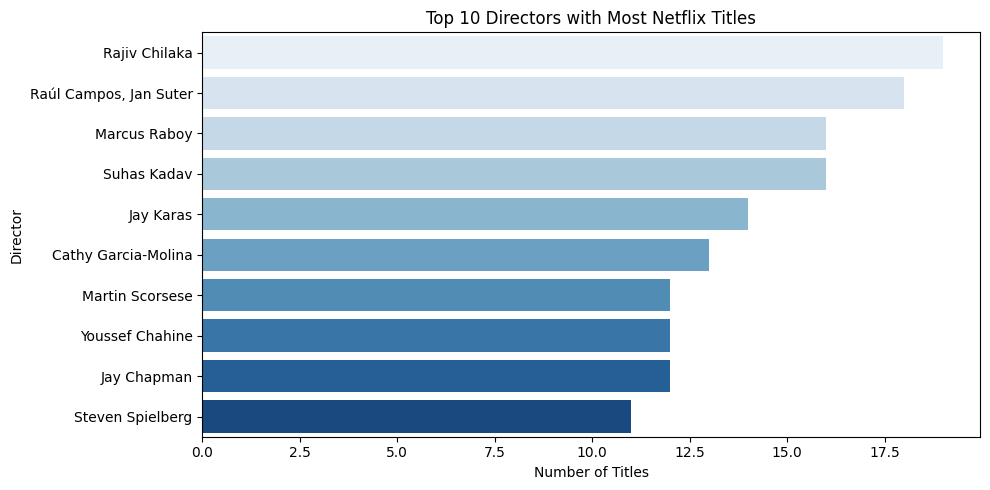

In [38]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sb.barplot(x=top_directors.values, y=top_directors.index, palette='Blues')
plt.title('Top 10 Directors with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
